In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv("Employee.csv")

In [3]:
dataset

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
dataset.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
df=pd.DataFrame(dataset.groupby('LeaveOrNot')['LeaveOrNot'].count())
df

,LeaveOrNot
LeaveOrNot,
0,3053
1,1600


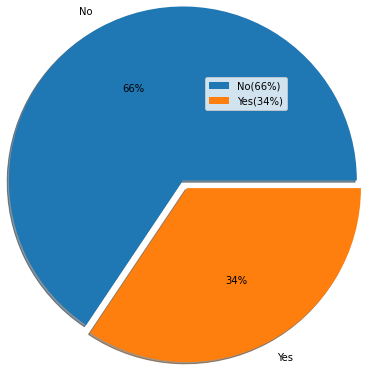

In [7]:
plt.pie(df['LeaveOrNot'],labels=('No','Yes'),autopct="%.0f%%",radius=2,explode=(0,0.1),shadow=True)
plt.legend(['No(66%)','Yes(34%)'])

 ## Missing values

In [8]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

we can observed that there are no missing values in the dataset

## Numerical variables

In [9]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables:  5


,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
0,2017,3,34,0,0
1,2013,1,28,3,1
2,2014,3,38,2,0
3,2016,3,27,5,1
4,2017,3,24,2,1


we can observe that we have 5 numeical variables in the given dataset.

## Categorical Variables

In [10]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']

dataset[categorical_features].head()

,Education,City,Gender,EverBenched
0,Bachelors,Bangalore,Male,No
1,Bachelors,Pune,Female,No
2,Bachelors,New Delhi,Female,No
3,Masters,Bangalore,Male,No
4,Masters,Pune,Male,Yes


we can observe that we have 5 categorical variables in the given dataset.

## Education

In [11]:
df_2=pd.DataFrame(dataset.groupby('Education')['Education'].count())
df_2

,Education
Education,
Bachelors,3601
Masters,873
PHD,179


([<matplotlib.patches.Wedge at 0x22309436280>,
 [Text(-1.6679876655459285, 1.43450937521741, 'Bachelors'),
  Text(1.5502764231826525, -1.69901236361717, 'Masters'),
  Text(2.3824938337951527, -0.2893494978880688, 'PHD')],
 [Text(-0.9098114539341426, 0.7824596592094963, '77%'),
  Text(0.8762431957119339, -0.9603113359575308, '19%'),
  Text(1.3897880697138387, -0.16878720710137343, '4%')])

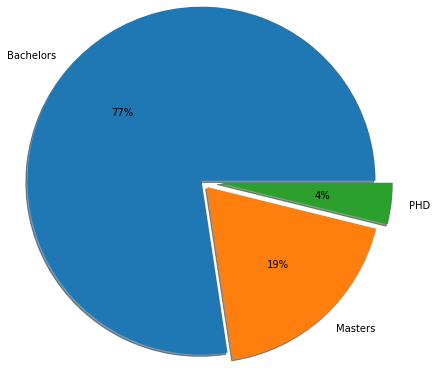

In [12]:
df_2=pd.DataFrame(dataset.groupby('Education')['Education'].count())
plt.pie(df_2['Education'],labels=['Bachelors','Masters','PHD'],radius=2,explode=(0,0.1,0.2),shadow=True,autopct=("%.0f%%"))

In [13]:
df_1=pd.DataFrame(dataset.groupby(['Education','LeaveOrNot'])['Education'].count())
df_1

Education
Education LeaveOrNot           
Bachelors 0                2472
          1                1129
Masters   0                 447
          1                 426
PHD       0                 134
          1                  45

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

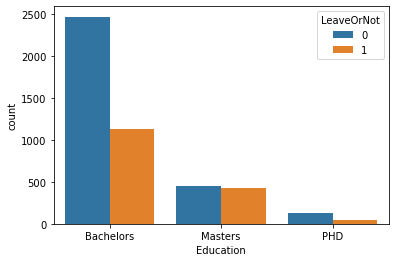

In [14]:
sns.countplot(dataset['Education'],hue=dataset['LeaveOrNot'])

In [15]:
prop_df=[]
for val in np.sort(dataset['Education'].unique()):
    prop=df_1['Education'][val][1]/(df_1['Education'][val][1]+df_1['Education'][val][0])
    prop_df.append({
        'Education':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,Education,proportion
1,Masters,0.487973
0,Bachelors,0.313524
2,PHD,0.251397


Text(0.5, 0, 'Education')

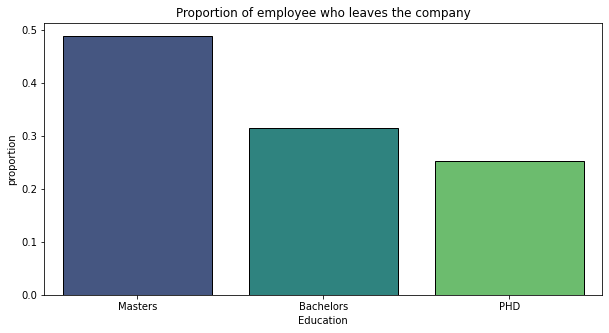

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['Education'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['Education'])
plt.title("Proportion of employee who leaves the company")
plt.xlabel('Education')

we can observe from the above graph that more number of Masters are leaving compared to Bachelors ,PHD

## JoiningYear

In [17]:
df_2=pd.DataFrame(dataset.groupby(['JoiningYear','LeaveOrNot'])['JoiningYear'].count())
df_2

JoiningYear
JoiningYear LeaveOrNot             
2012        0                   395
            1                   109
2013        0                   445
            1                   224
2014        0                   526
            1                   173
2015        0                   463
            1                   318
2016        0                   408
            1                   117
2017        0                   811
            1                   297
2018        0                     5
            1                   362

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

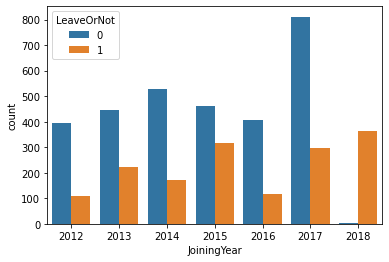

In [18]:
sns.countplot(dataset['JoiningYear'],hue=dataset['LeaveOrNot'])

In [19]:
prop_df=[]
for val in np.sort(dataset['JoiningYear'].unique()):
    prop=df_2['JoiningYear'][val][1]/(df_2['JoiningYear'][val][1]+df_2['JoiningYear'][val][0])
    prop_df.append({
        'JoiningYear':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,JoiningYear,proportion
6,2018,0.986376
3,2015,0.407170
1,2013,0.334828
5,2017,0.268051
2,2014,0.247496
4,2016,0.222857
0,2012,0.216270


Text(0.5, 0, 'JoiningYear')

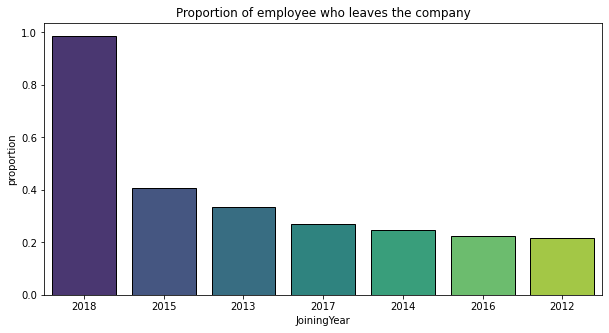

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['JoiningYear'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['JoiningYear'])
plt.title("Proportion of employee who leaves the company")
plt.xlabel('JoiningYear')

## PaymentTier

In [21]:
df_3=pd.DataFrame(dataset.groupby(['PaymentTier','LeaveOrNot'])['PaymentTier'].count())
df_3

PaymentTier
PaymentTier LeaveOrNot             
1           0                   154
            1                    89
2           0                   368
            1                   550
3           0                  2531
            1                   961

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

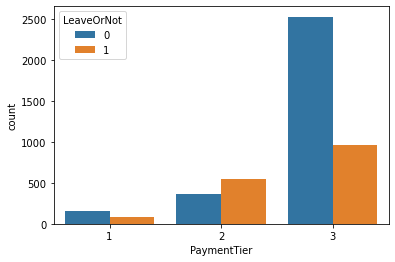

In [22]:
sns.countplot(dataset['PaymentTier'],hue=dataset['LeaveOrNot'])

In [23]:
prop_df=[]
for val in np.sort(dataset['PaymentTier'].unique()):
    prop=df_3['PaymentTier'][val][1]/(df_3['PaymentTier'][val][1]+df_3['PaymentTier'][val][0])
    prop_df.append({
        'PaymentTier':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,PaymentTier,proportion
1,2,0.599129
0,1,0.366255
2,3,0.275200


Text(0.5, 0, 'PaymentTier')

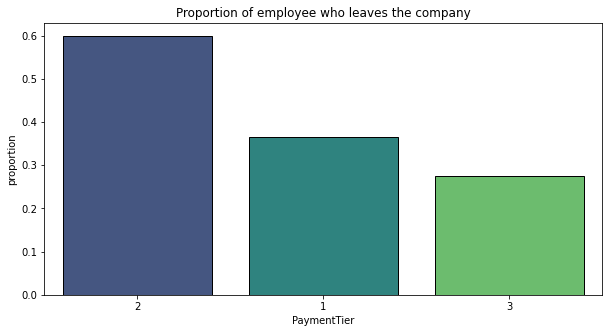

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['PaymentTier'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['PaymentTier'])
plt.title("Proportion of employee who leaves the company")
plt.xlabel('PaymentTier')

## Age

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


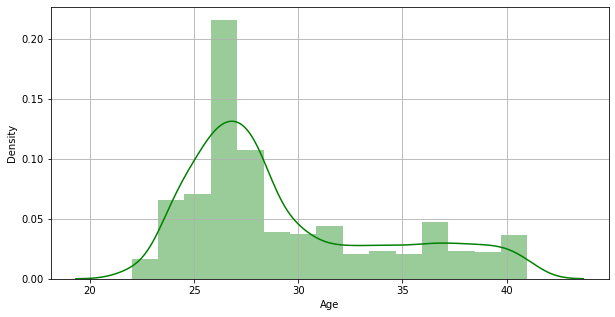

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(dataset['Age'],color='green',bins=15)
plt.grid(True)

## ExperienceInCurrentDomain

In [26]:
df_4=pd.DataFrame(dataset.groupby(['ExperienceInCurrentDomain','LeaveOrNot'])['ExperienceInCurrentDomain'].count())
df_4

ExperienceInCurrentDomain
ExperienceInCurrentDomain LeaveOrNot                           
0                         0                                 231
                          1                                 124
1                         0                                 370
                          1                                 188
2                         0                                 688
                          1                                 399
3                         0                                 487
                          1                                 299
4                         0                                 634
                          1                                 297
5                         0                                 631
                          1                                 288
6                         0                                   6
                          1                                   2
7                         0                                   6
                          1                                   3

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

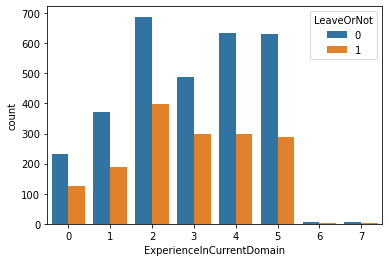

In [27]:
sns.countplot(dataset['ExperienceInCurrentDomain'],hue=dataset['LeaveOrNot'])

In [28]:
prop_df=[]
for val in np.sort(dataset['ExperienceInCurrentDomain'].unique()):
    prop=df_4['ExperienceInCurrentDomain'][val][1]/(df_4['ExperienceInCurrentDomain'][val][1]+df_4['ExperienceInCurrentDomain'][val][0])
    prop_df.append({
        'ExperienceInCurrentDomain':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,ExperienceInCurrentDomain,proportion
3,3,0.380407
2,2,0.367065
0,0,0.349296
1,1,0.336918
7,7,0.333333
4,4,0.319012
5,5,0.313384
6,6,0.250000


Text(0.5, 0, 'ExperienceInCurrentDomain')

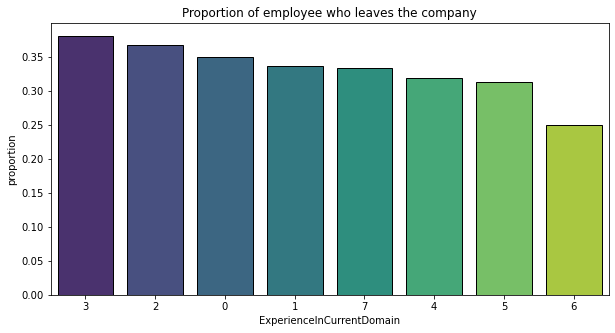

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['ExperienceInCurrentDomain'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['ExperienceInCurrentDomain'])
plt.title("Proportion of employee who leaves the company")
plt.xlabel('ExperienceInCurrentDomain')

## City

In [30]:
df_5=pd.DataFrame(dataset.groupby(['City','LeaveOrNot'])['City'].count())
df_5

City
City      LeaveOrNot      
Bangalore 0           1633
          1            595
New Delhi 0            791
          1            366
Pune      0            629
          1            639

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

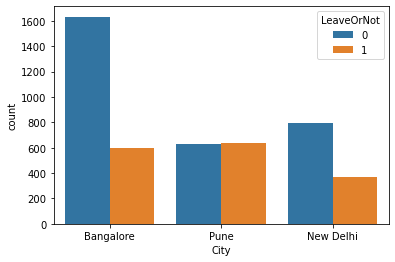

In [31]:
sns.countplot(dataset['City'],hue=dataset['LeaveOrNot'])

In [32]:
prop_df=[]
for val in np.sort(dataset['City'].unique()):
    prop=df_5['City'][val][1]/(df_5['City'][val][1]+df_5['City'][val][0])
    prop_df.append({
        'City':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,City,proportion
2,Pune,0.503943
1,New Delhi,0.316335
0,Bangalore,0.267056


Text(0.5, 0, 'City')

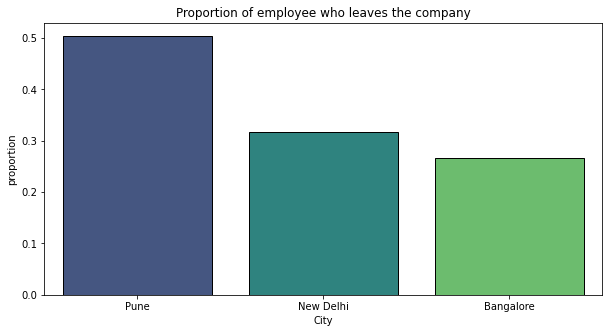

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['City'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['City'])
plt.title("Proportion of employee who leaves the company")
plt.xlabel('City')

## Gender

In [34]:
df_6=pd.DataFrame(dataset.groupby(['Gender','LeaveOrNot'])['Gender'].count())
df_6

Gender
Gender LeaveOrNot        
Female 0              991
       1              884
Male   0             2062
       1              716

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

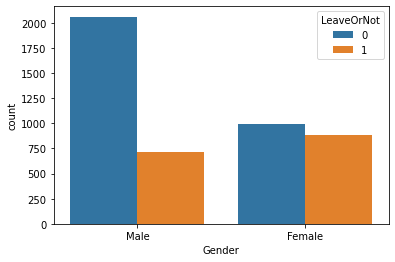

In [35]:
sns.countplot(dataset['Gender'],hue=dataset['LeaveOrNot'])

In [36]:
prop_df=[]
for val in np.sort(dataset['Gender'].unique()):
    prop=df_6['Gender'][val][1]/(df_6['Gender'][val][1]+df_6['Gender'][val][0])
    prop_df.append({
        'Gender':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,Gender,proportion
0,Female,0.471467
1,Male,0.257739


Text(0.5, 0, 'Gender')

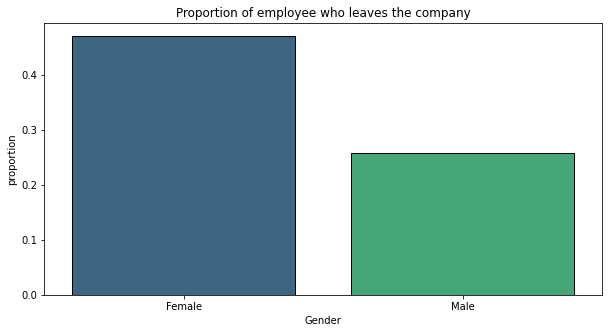

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['Gender'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['Gender'])
plt.title("Proportion of employee who leaves the company")
plt.xlabel('Gender')

## EverBenched

In [38]:
df_7=pd.DataFrame(dataset.groupby(['EverBenched','LeaveOrNot'])['EverBenched'].count())
df_7

EverBenched
EverBenched LeaveOrNot             
No          0                  2792
            1                  1383
Yes         0                   261
            1                   217

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EverBenched', ylabel='count'>

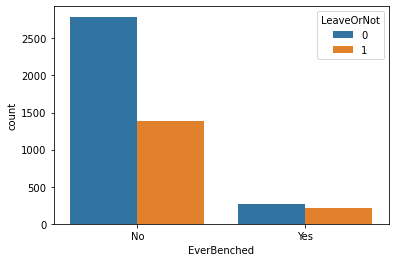

In [39]:
sns.countplot(dataset['EverBenched'],hue=dataset['LeaveOrNot'])

In [40]:
prop_df=[]
for val in np.sort(dataset['EverBenched'].unique()):
    prop=df_7['EverBenched'][val][1]/(df_7['EverBenched'][val][1]+df_7['EverBenched'][val][0])
    prop_df.append({
        'EverBenched':val,
        'proportion':prop
    })

prop_df=pd.DataFrame(prop_df)
prop_df.sort_values('proportion',ascending=False,inplace=True)
prop_df

,EverBenched,proportion
1,Yes,0.453975
0,No,0.331257


Text(0.5, 0, 'EverBenched')

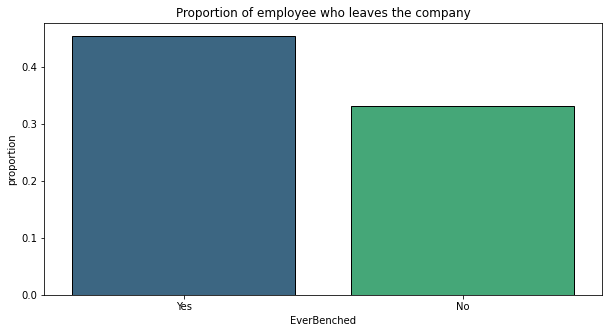

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(x=prop_df['EverBenched'],y=prop_df['proportion'],palette='viridis',edgecolor="black",order=prop_df['EverBenched'])
plt.title("Proportion of employee who leaves the company")
plt.xlabel('EverBenched')

In [42]:
dataset.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


## EDA Conclusion

- In terms of education employees with Masters degree are most likely to leave the company.
- Employees who joined in recent year are most likely to leave the company. Maybe they are not satisfied with thier salary or their department work culture.
- Employee from Pune are most likely to leave the company.
- In terms of Salary , employee with PaymentTier 2 are most likely to leave the company.
- Female employee are more likely to leave the company.
- Most of the employee who were benched left the company.
- As we analysed in joining year the employees with less experience are the one's who are leaving the company.

## Data Preprocessing

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
cat_feature=['Education','JoiningYear','City','PaymentTier','Gender','EverBenched','ExperienceInCurrentDomain']

In [45]:
cat_feature

['Education',
 'JoiningYear',
 'City',
 'PaymentTier',
 'Gender',
 'EverBenched',
 'ExperienceInCurrentDomain']

In [46]:
data=dataset.copy()

In [47]:
for col in cat_feature:
    data[col]=le.fit_transform(data[col])

In [48]:
data.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,2,34,1,0,0,0
1,0,1,2,0,28,0,0,3,1
2,0,2,1,2,38,0,0,2,0
3,1,4,0,2,27,1,0,5,1
4,1,5,2,2,24,1,1,2,1


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x=data.drop(['LeaveOrNot','ExperienceInCurrentDomain'],axis=1)
y=data.LeaveOrNot

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

# Model Fitting

In [51]:
scores=[]

from sklearn.metrics import f1_score

# XGBRF Classifier

In [52]:
from xgboost import XGBRFClassifier

model=XGBRFClassifier(eval_metric='mlogloss',
                     random_state=50,
                     learning_rate=0.05,
                     max_depth=15,
                     scale_pos_weight=1.2)
model.fit(x_train,y_train)

C:\Users\surya\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False,
                eval_metric='mlogloss', gamma=0, gpu_id=-1,
                importance_type=None, interaction_constraints='',
                learning_rate=0.05, max_delta_step=0, max_depth=15,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', predictor='auto', random_state=50,
                reg_alpha=0, scale_pos_weight=1.2, tree_method='exact',
                validate_parameters=1, verbosity=None)

In [53]:
pred=model.predict(x_test)

scores.append({
    'model':'XGBRFClassifier',
    'score':model.score(x_test,y_test),
    'f1_score':f1_score(y_test,pred)
})

model.score(x_test,y_test)

0.8754027926960258

<AxesSubplot:xlabel='score', ylabel='model'>

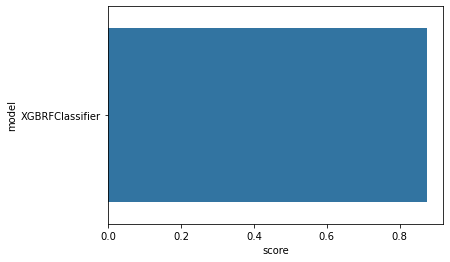

In [54]:
score=pd.DataFrame(scores,columns=['model','score','f1_score'])

sns.barplot(y=score['model'],x=score['score'])

In [55]:
import pickle


In [56]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [57]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8754027926960258


## conclusion

By using XGBRFClassifier algorithm we got 87.54027926960258 % accuracy.

### Thank You